In [789]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from datetime import datetime
plt.style.use('seaborn-v0_8')

In [790]:
df=pd.read_csv(r"C:\Users\Basel\Desktop\Data Analysis Projects\Customer Segmentation in Python – Machine Learning Tutorial\marketing_campaign.csv")

In [791]:
df["Total Children"] = df["Kidhome"] + df["Teenhome"]

In [792]:
df["TotalAmountSpent"] = df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntSweetProducts"] + df["MntMeatProducts"] + df["MntWines"]

In [793]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total Children,TotalAmountSpent
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,1,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,1,422


In [794]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total Children', 'TotalAmountSpent'],
      dtype='object')

In [795]:
df["TotalAmountSpent"] = df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntSweetProducts"] + df["MntMeatProducts"] + df["MntWines"]

In [796]:
df['Age']=df['Year_Birth'].apply(lambda x : datetime.now().year-x)

In [797]:
df['Age'].describe()

count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64

In [798]:
palette = ["#fee090", "#fdae61", "#4575b4", "#313695"]

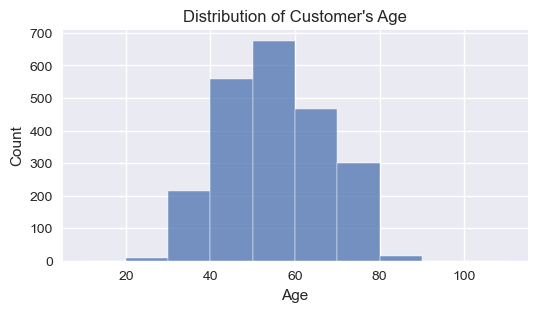

In [882]:
plt.figure(figsize=(6,3))
sns.histplot(data=df['Age'],bins=range(10,120,10))
plt.title("Distribution of Customer's Age")
plt.show()

In [800]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

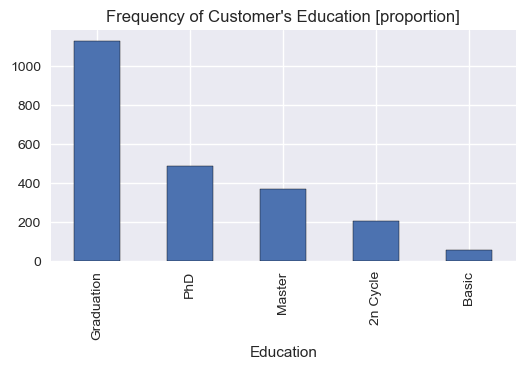

In [881]:
plt.figure(figsize=(6,3))
df['Education'].value_counts().plot(kind='bar',edgecolor='black')
plt.title("Frequency of Customer's Education [proportion]")
plt.show()

In [802]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [803]:
df["Marital_Status"].replace({"Together":"Married", "Absurd":"Single", "Divorced":"Single", "Alone":"Single", "YOLO":"Single", "Widow":"Single"},inplace=True)

In [804]:
df["Marital_Status"].value_counts()

Marital_Status
Married    1444
Single      796
Name: count, dtype: int64

<Axes: title={'center': 'Proportion of Customers Marital Status'}, xlabel='Marital_Status', ylabel='Count'>

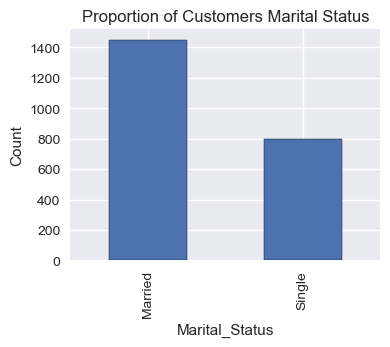

In [880]:
plt.figure(figsize=(4,3))
df["Marital_Status"].value_counts().plot(kind='bar',title='Proportion of Customers Marital Status',ylabel='Count',edgecolor='black')

Text(0.5, 1.0, 'Distribution of Customers Income')

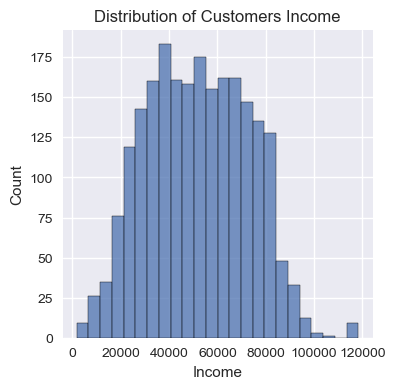

In [878]:
plt.figure(figsize=(4,4))
sns.histplot(data=df,x=df["Income"],edgecolor='black')
plt.title("Distribution of Customers Income")

Text(0.5, 1.0, 'Distribution of Total Amount Spent on Product by Customers [Proportion]')

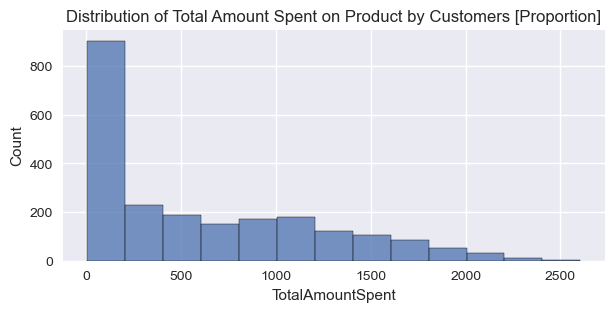

In [877]:
plt.figure(figsize=(7,3))
sns.histplot(data=df,x=df["TotalAmountSpent"], binwidth=200,edgecolor='black')
plt.title("Distribution of Total Amount Spent on Product by Customers [Proportion]")

Text(0.5, 1.0, "Proportion of Customer's Total Children at Home")

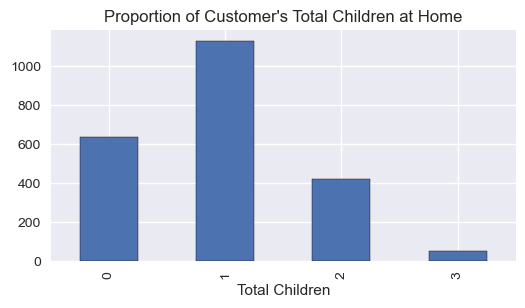

In [875]:
plt.figure(figsize=(6,3))
df["Total Children"].value_counts().sort_index().plot(kind='bar',edgecolor='black')
plt.title("Proportion of Customer's Total Children at Home")

In [809]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

In [810]:
df['Income'][df['Income']>upper_bound]=upper_bound

C:\Users\Basel\AppData\Local\Temp\ipykernel_14024\1540131578.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [811]:
df['Income'][df['Income']<lower_bound]=upper_bound

C:\Users\Basel\AppData\Local\Temp\ipykernel_14024\3143878203.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, "Relationship Between Customer's Income and Total Amount Spent")

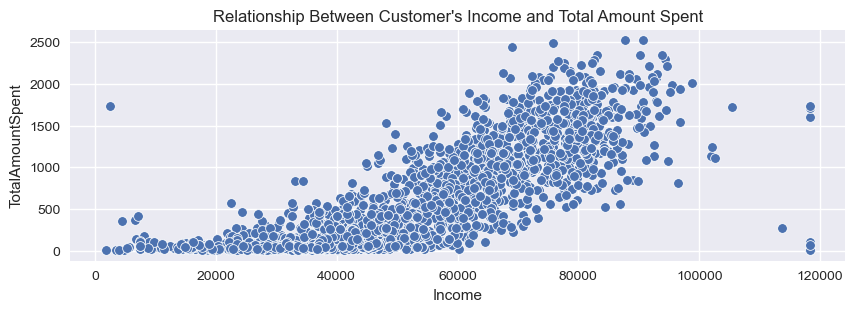

In [812]:
plt.figure(figsize=(10,3))
sns.scatterplot(data=df,x='Income',y='TotalAmountSpent')
plt.title("Relationship Between Customer's Income and Total Amount Spent")

Text(0.5, 1.0, 'Relationship between Income VS Total Amount Spent Based on Education')

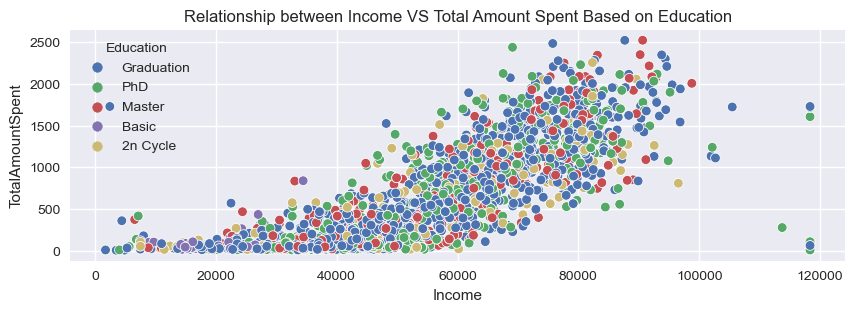

In [813]:
plt.figure(figsize=(10,3))
sns.scatterplot(data=df,x='Income',y='TotalAmountSpent',hue='Education')
plt.title("Relationship between Income VS Total Amount Spent Based on Education")

In [814]:
def group_age(age):
    if age <20:
        return "11-20"
    elif age > 20 and age <31:
        return "21-30"
    elif age > 30 and age <41:
        return "31-40"
    elif age > 40 and age <51:
        return "41-50"
    elif age > 50 and age <61:
        return "51-60"
    elif age > 60 and age <71:
        return "61-70"
    elif age > 70 and age <81:
        return "71-80"
    elif age > 80:
        return ">80"

In [815]:
df['Age Group']=df['Age'].apply(lambda x : group_age(x))

<Axes: title={'center': 'Relationship between Age Range and Total Amount Spent'}, xlabel='Age Group', ylabel='Total Amount Spent'>

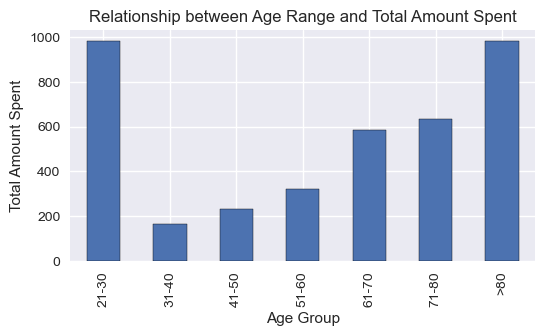

In [874]:
df['TotalAmountSpent'].groupby(df['Age Group']).median().plot(kind='bar',title="Relationship between Age Range and Total Amount Spent",ylabel='Total Amount Spent',
                                                             figsize=(6,3),edgecolor='black')

<Axes: title={'center': 'Relationship between Age Range and Income'}, xlabel='Age Group', ylabel='Income'>

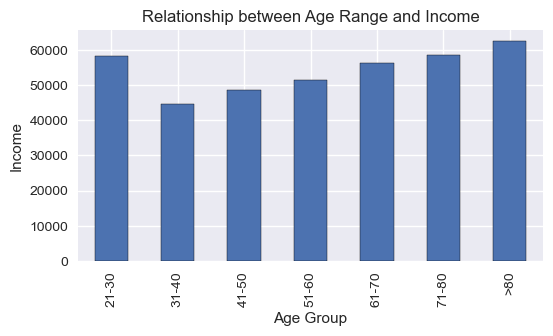

In [873]:
df['Income'].groupby(df['Age Group']).mean().plot(kind='bar',title="Relationship between Age Range and Income",ylabel='Income',
                                                             figsize=(6,3),edgecolor='black')

<Axes: title={'center': 'Relationship between Education and Income'}, xlabel='Education', ylabel='Income'>

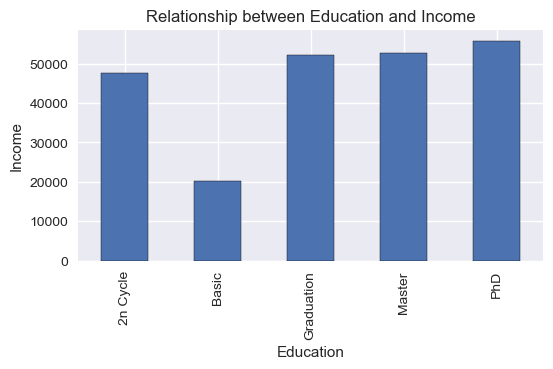

In [872]:
df['Income'].groupby(df['Education']).mean().plot(kind='bar',title="Relationship between Education and Income",ylabel='Income',
                                                             figsize=(6,3),edgecolor='black')

<Axes: title={'center': 'Relationship between Marital Status and Total Amount Spent'}, xlabel='Marital_Status', ylabel='Total Amount Spent'>

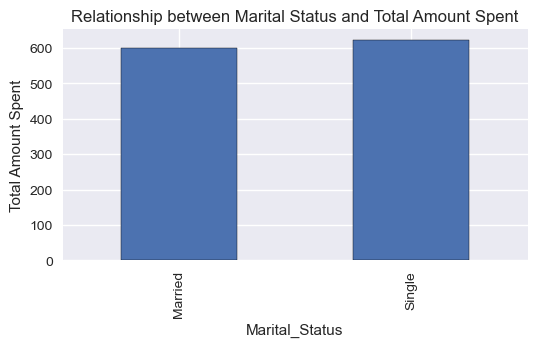

In [871]:
df.groupby('Marital_Status')['TotalAmountSpent'].mean().plot(kind='bar',title="Relationship between Marital Status and Total Amount Spent",ylabel='Total Amount Spent',
                                                             figsize=(6,3),edgecolor='black')

<Axes: title={'center': 'Relationship between Marital Status and Income'}, xlabel='Marital_Status', ylabel='Income'>

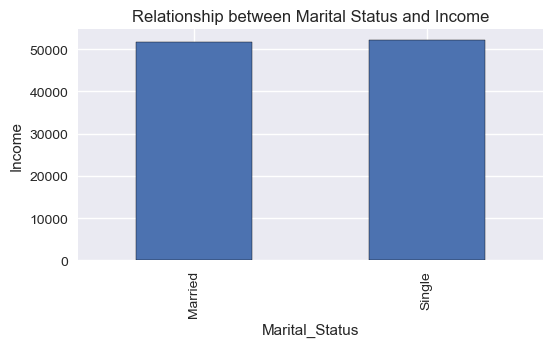

In [870]:
df.groupby('Marital_Status')['Income'].mean().plot(kind='bar',title="Relationship between Marital Status and Income",ylabel='Income',
                                                             figsize=(6,3),edgecolor='black')

In [821]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total Children', 'TotalAmountSpent', 'Age', 'Age Group'],
      dtype='object')

<Axes: title={'center': "Relationship between Customer's Total Children and Amount Spent [Average]"}, xlabel='Total Children', ylabel='Total Amount Spent'>

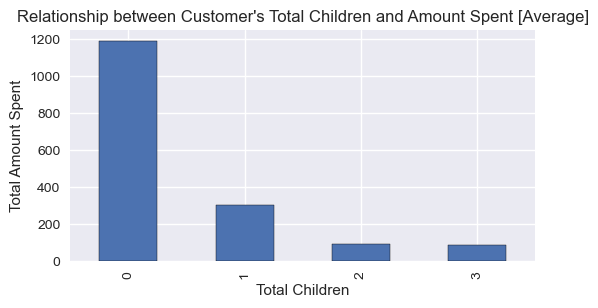

In [869]:
df.groupby('Total Children')['TotalAmountSpent'].median().plot(kind='bar',title="Relationship between Customer's Total Children and Amount Spent [Average]",ylabel='Total Amount Spent',
                                                             figsize=(6,3),edgecolor='black')

<Axes: title={'center': "Relationship between Customer's Total Children and Income [Average]"}, xlabel='Total Children', ylabel='Income'>

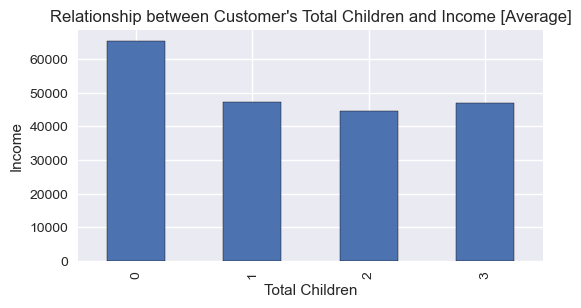

In [868]:
df.groupby('Total Children')['Income'].mean().plot(kind='bar',title="Relationship between Customer's Total Children and Income [Average]",ylabel='Income',
                                                             figsize=(6,3),edgecolor='black')

In [824]:
df['Income'].fillna(df['Income'].median(),inplace=True)

In [825]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total Children', 'TotalAmountSpent', 'Age', 'Age Group'],
      dtype='object')

In [826]:
data=df[['Income','TotalAmountSpent']]

In [827]:
scaler=StandardScaler()

In [828]:
data_scaled=scaler.fit_transform(data)

In [829]:
errors=[]
for k in range(1,11):
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(data_scaled)
    errors.append(model.inertia_)

C:\Users\Basel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Basel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Basel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Basel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Basel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

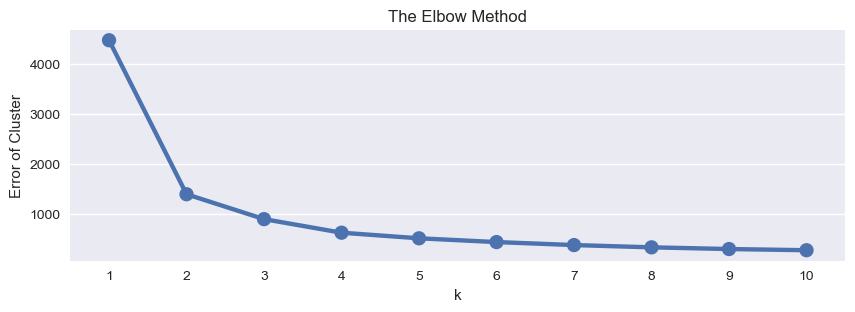

In [830]:
plt.figure(figsize=(10,3))
sns.pointplot(x=list(range(1,11)),y=errors)
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('Error of Cluster')
plt.show()

In [831]:
model=KMeans(n_clusters=3,random_state=42)
model.fit(data_scaled)

C:\Users\Basel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

In [832]:
data['clusterNo']=model.labels_

C:\Users\Basel\AppData\Local\Temp\ipykernel_14024\2728408144.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [833]:
data.groupby('clusterNo').median()

,Income,TotalAmountSpent
clusterNo,,
0,77343.0,1477.0
1,34412.0,65.0
2,59597.5,681.0


Text(0.5, 1.0, 'Customer Segmentation Using KMeans Clustering')

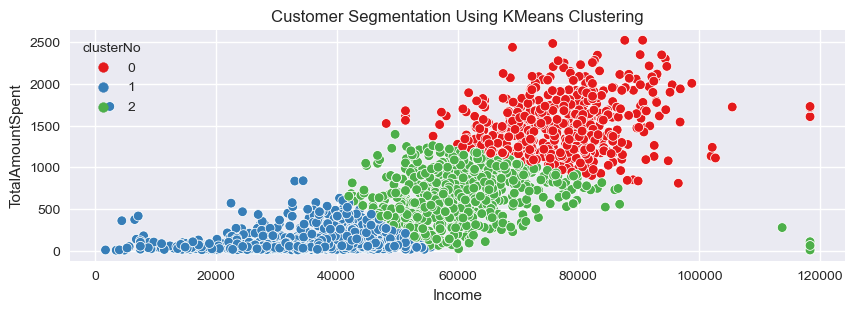

In [834]:
plt.figure(figsize=(10,3))
sns.scatterplot(data=data,x='Income',y='TotalAmountSpent',hue='clusterNo',palette="Set1")
plt.title("Customer Segmentation Using KMeans Clustering")

In [835]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total Children', 'TotalAmountSpent', 'Age', 'Age Group'],
      dtype='object')

In [836]:
df['Marital_Status'].unique()

array(['Single', 'Married'], dtype=object)

In [837]:
df['isMarried']=df['Marital_Status'].apply(lambda x: 1 if x=='Married' else 0)

In [838]:
df['Education']=pd.Categorical(df['Education'])

In [839]:
df['Education_int']=df['Education'].cat.codes

In [840]:
data=df[['Income','TotalAmountSpent','Age','Recency','Total Children','isMarried','Education_int']]

In [841]:
data.head()

,Income,TotalAmountSpent,Age,Recency,Total Children,isMarried,Education_int
0,58138.0,1617,67,58,0,0,2
1,46344.0,27,70,38,2,0,2
2,71613.0,776,59,26,0,1,2
3,26646.0,53,40,26,1,1,2
4,58293.0,422,43,94,1,1,4


In [842]:
df_corr=data.corr(method='pearson')

<Axes: >

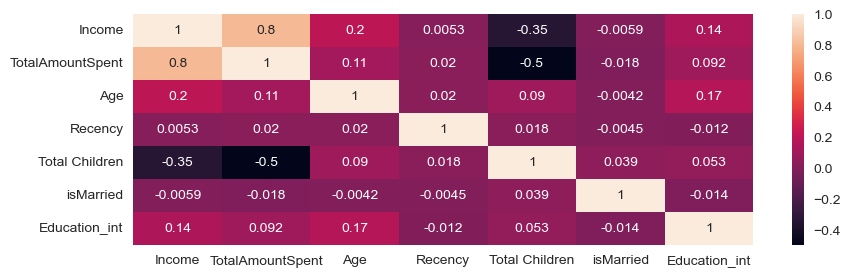

In [843]:
plt.figure(figsize=(10,3))
sns.heatmap(data=df_corr,annot=True)

In [844]:
data_corr=df[['Income','TotalAmountSpent','Age']]

In [845]:
scaler2=MinMaxScaler()

In [846]:
data_scaled=scaler2.fit_transform(data_corr)

In [847]:
errors=[]
for k in range(1,11):
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(data_scaled)
    errors.append(model.inertia_)

C:\Users\Basel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Basel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Basel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Basel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Basel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of

In [848]:
len(errors)

10

<Axes: >

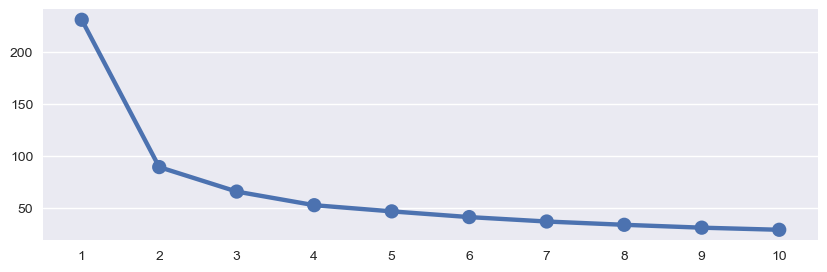

In [860]:
plt.figure(figsize=(10,3))
sns.pointplot(x=list(range(1,11)),y=errors)

In [850]:
model=KMeans(n_clusters=2,random_state=42,n_init=2)
model.fit(data_scaled)

KMeans(n_clusters=2, n_init=2, random_state=42)

In [851]:
data_corr['nCluster']=model.labels_

C:\Users\Basel\AppData\Local\Temp\ipykernel_14024\3044426346.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [852]:
data_corr.groupby('nCluster').median()

,Income,TotalAmountSpent,Age
nCluster,,,
0,38508.0,92.0,53.0
1,71819.0,1179.0,57.0


In [853]:
np.unique(model.labels_)

array([0, 1])

In [854]:
scaler2.inverse_transform(model.cluster_centers_).shape

(2, 3)

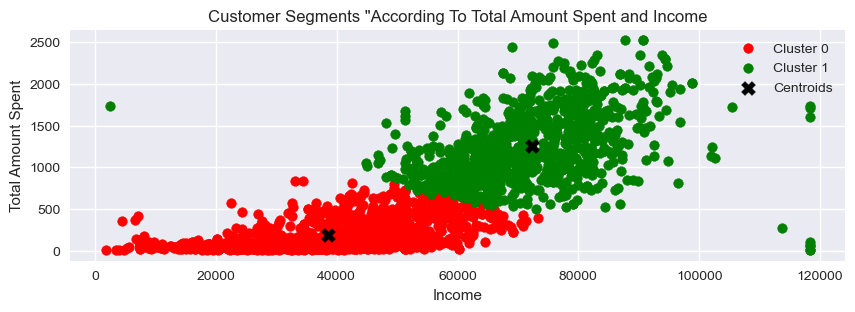

In [861]:
plt.figure(figsize=(10,3))

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Define colors for clusters

for i in range(0,2):
    cluster_data = data_corr[data_corr['nCluster'] == i]
    plt.scatter(cluster_data['Income'], cluster_data['TotalAmountSpent'], 
                color=colors[i % len(colors)], label=f'Cluster {i}')

# Plot centroids
centroids = scaler2.inverse_transform(model.cluster_centers_)
plt.scatter(centroids[:,0], centroids[:,1], 
            color='black', marker='X', s=100, label='Centroids')

plt.xlabel('Income')
plt.ylabel('Total Amount Spent')
plt.title('Customer Segments "According To Total Amount Spent and Income')
plt.legend()
plt.show()

In [856]:
scaler2.inverse_transform(model.cluster_centers_).shape

(2, 3)

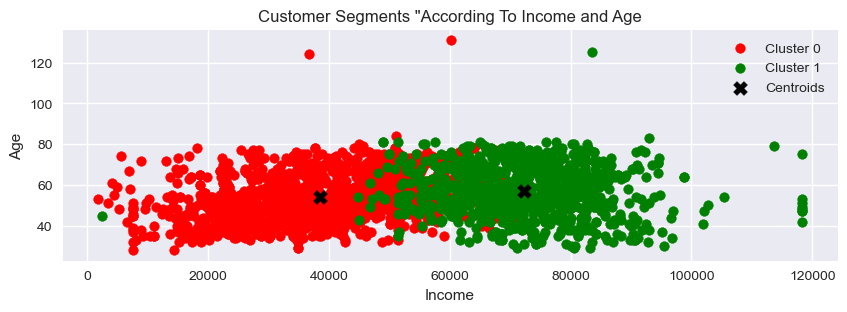

In [862]:
plt.figure(figsize=(10,3))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Define colors for clusters

for i in range(0,2):
    cluster_data = data_corr[data_corr['nCluster'] == i]
    plt.scatter(cluster_data['Income'], cluster_data['Age'], 
                color=colors[i % len(colors)], label=f'Cluster {i}')

# Plot centroids
centroids = scaler2.inverse_transform(model.cluster_centers_)
plt.scatter(centroids[:,0], centroids[:,2], 
            color='black', marker='X', s=100, label='Centroids')

plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Customer Segments "According To Income and Age')
plt.legend()
plt.show()

In [858]:
scaler2.inverse_transform(model.cluster_centers_).shape

(2, 3)

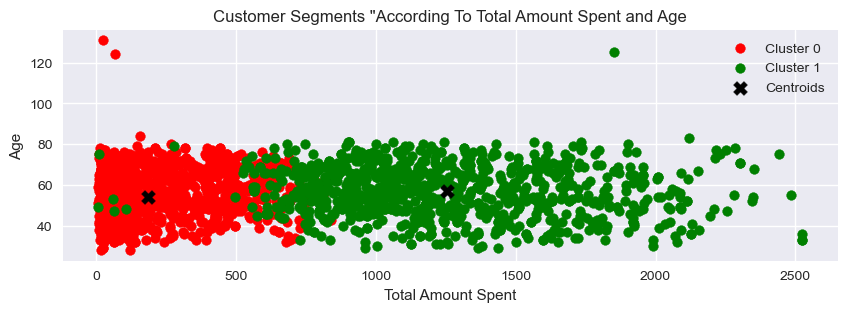

In [863]:
plt.figure(figsize=(10,3))

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Define colors for clusters

for i in range(0,2):
    cluster_data = data_corr[data_corr['nCluster'] == i]
    plt.scatter(cluster_data['TotalAmountSpent'], cluster_data['Age'], 
                color=colors[i % len(colors)], label=f'Cluster {i}')

# Plot centroids
centroids = scaler2.inverse_transform(model.cluster_centers_)
plt.scatter(centroids[:,1], centroids[:,2], 
            color='black', marker='X', s=100, label='Centroids')

plt.xlabel('Total Amount Spent')
plt.ylabel('Age')
plt.title('Customer Segments "According To Total Amount Spent and Age')
plt.legend()
plt.show()